In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import altair as alt

In [3]:
# Fetch keywords data
model_data = pd.read_csv("/Users/chrysentiaclarissa/Downloads/NLP Book Recommendation System/Book-Recommendation-System-main/keywords.csv")
model_data.head()

,isbn,book_title,book_author,year_of_publication,publisher,keywords
0,0195153448,classical mythology,mark_p_morford,2002.0,oxford_university_press,mark_p_morford oxford_university_press archaeo...
1,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,richard_bruce_wright harperflamingo_canada nor...
2,0060973129,decision normandy,carlo_deste,1991.0,harperperennial,carlo_deste harperperennial normandy invasion ...
3,0374157065,flu story great influenza pandemic 1918 search...,gina_bari_kolata,1999.0,farrar_straus_giroux,gina_bari_kolata farrar_straus_giroux epidemic...
4,0393045218,mummy urumchi,e_j_w_barber,1999.0,w_w_norton_amp_company,e_j_w_barber w_w_norton_amp_company himalayan ...


In [4]:
model_data.shape

(12545, 6)

## TF-IDF Vectorizer

In [5]:
tfidf = TfidfVectorizer(analyzer = 'word',
                        min_df=3,
                        max_df = 0.6,
                        stop_words="english",
                        encoding = 'utf-8', 
                        token_pattern=r"(?u)\S\S+")
tfidf_matrix = tfidf.fit_transform(model_data['keywords'])

In [6]:
# Preview first 300 words in the vocabulary
print(tfidf.get_feature_names_out()[1:300])

['101' '1800s' '1818' '1840s' '1860s' '1863' '1867' '1880s' '1886' '1903'
 '1912' '1914' '1916' '1917' '1920s' '1921' '1925' '1930s' '1938' '1939'
 '1940' '1940s' '1941' '1942' '1943' '1944' '1945' '1947' '1948' '1950'
 '1950s' '1957' '1960' '1960s' '1962' '1967' '1970s' '1975' '1976' '1980'
 '1980s' '1982' '1983' '1984' '1986' '1988' '1990' '1991' '1992' '1993'
 '1994' '1995' '1996' '1997' '1998' '1999' '19th' '1stbooks_library' '200'
 '2000' '2001' '2002' '2003' '2004' '451' '911' 'aaron_fletcher'
 'abandoned' 'abbess' 'abbeville_press' 'abbey' 'abby' 'abbys' 'abc'
 'abducted' 'abduction' 'abigail' 'abingdon_press' 'aboard' 'abolitionist'
 'aboriginal' 'aborigine' 'abortion' 'abraham' 'abundance' 'abuse'
 'abused' 'abusive' 'acacia_press_inc' 'academic' 'academy'
 'academy_chicago_publisher' 'accident' 'accidentally' 'acclaimed'
 'accomplishment' 'account' 'accused' 'ace' 'ace_book' 'ace_charter'
 'achieve' 'achieving' 'acontecimiento' 'acorna' 'acquaintance' 'act'
 'actes_sud' 'acti

In [107]:
# Lets find representation of a new book's keywords in the existing vocabulary space
tfidf.transform(["new moon by stephenie meyer"]).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

## Visualize the TF-IDF word embeddings

In [7]:
# Convert the TF-IDF matrix to a dense format and create a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=model_data["book_title"])
tfidf_df.head()

,100,101,1800s,1818,1840s,1860s,1863,1867,1880s,1886,...,zonderkidz,zondervan,zondervan_publishing_company,zoo,zora_neale_hurston,zsolnay,zu,zum,événement,éxito
book_title,,,,,,,,,,,,,,,,,,,,,
classical mythology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clara callan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
decision normandy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flu story great influenza pandemic 1918 search virus caused,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mummy urumchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_df)

# DataFrame with the PCA results
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=['PC1', 'PC2'])
tfidf_pca_df.head()

,PC1,PC2
0,-0.003587,-0.008019
1,-0.018184,-0.002632
2,-0.018684,-0.011701
3,-0.026605,-0.010597
4,-0.028345,-0.013610


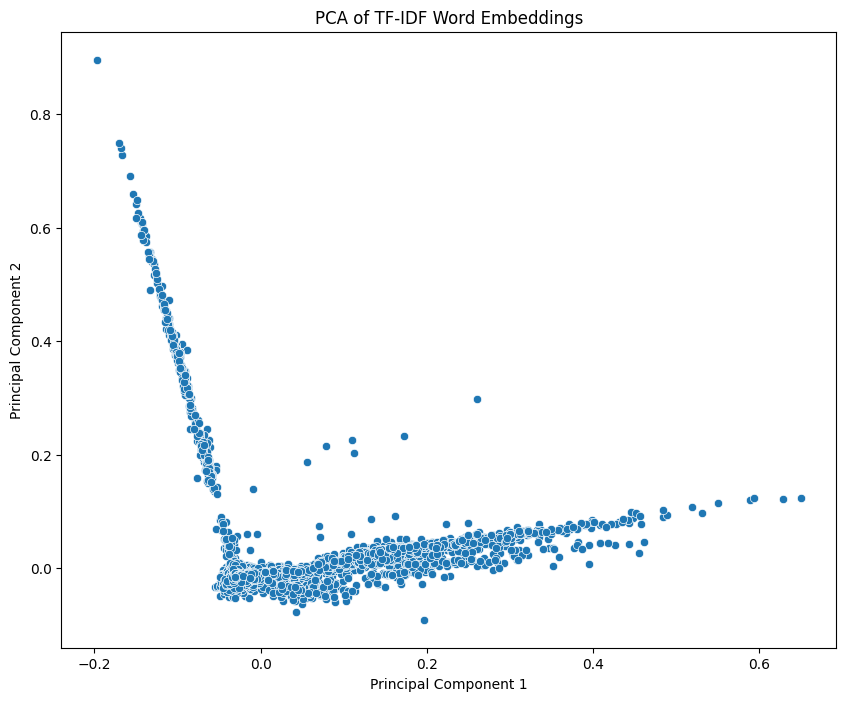

In [9]:
# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=tfidf_pca_df)
plt.title('PCA of TF-IDF Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
# Find top 50 books with maximum tf-idf total score
tfidf_df["total"]= tfidf_df.sum(axis=1)
tfidf_df = tfidf_df.sort_values("total", ascending=False)
del tfidf_df["total"]

In [20]:
# Leave first few words containing years and select top 50 books
tfidf_df_preview = tfidf_df.iloc[100:150,25:].copy()
tfidf_df_preview = tfidf_df_preview.stack().reset_index()
tfidf_df_preview = tfidf_df_preview.rename(columns={0:'tfidf', 'book_title': 'book','level_1': 'term'})
tfidf_df_preview = tfidf_df_preview.sort_values(by=['book','tfidf'], ascending=[True,False]).groupby(['book']).head(10)
display(tfidf_df_preview)

,book,term,tfidf
96664,20000 league sea wordsworth collection,davy,0.431345
95693,20000 league sea wordsworth collection,atlantis,0.414904
98239,20000 league sea wordsworth collection,jules_verne,0.392819
100512,20000 league sea wordsworth collection,submarine,0.368755
99171,20000 league sea wordsworth collection,ntccontemporary_publishing_company,0.350787
...,...,...,...
267903,wicked dawn cynster novel,wedding,0.324977
262528,wicked dawn cynster novel,avon_book,0.317668
262108,wicked dawn cynster novel,1943,0.000000
262109,wicked dawn cynster novel,1944,0.000000


In [21]:
def process_word_matrix(word_vec):
    # Remove underscores in terms
    word_vec.term = word_vec.term.str.replace('_',' ')

    # Remove terms with zero tfidf score
    word_vec = word_vec[word_vec.tfidf > 0]
    
    return word_vec

tfidf_vec = process_word_matrix(tfidf_df_preview.copy())    
tfidf_vec.iloc[0:5]

,book,term,tfidf
96664,20000 league sea wordsworth collection,davy,0.431345
95693,20000 league sea wordsworth collection,atlantis,0.414904
98239,20000 league sea wordsworth collection,jules verne,0.392819
100512,20000 league sea wordsworth collection,submarine,0.368755
99171,20000 league sea wordsworth collection,ntccontemporary publishing company,0.350787


In [22]:
grid = alt.Chart(tfidf_vec).encode(
    x = 'rank:O',
    y = 'book:N'
).transform_window(
    rank = "dense_rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["book"],
)
heatmap = grid.mark_rect(size=5).encode(
    alt.Color('tfidf:Q', scale=alt.Scale(scheme='redpurple'))
)
text = grid.mark_text(align='center', baseline='middle', lineBreak='').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)
(heatmap+text).properties(width = 800)

alt.LayerChart(...)

## Cosine similarity

In [23]:
# Calculate the similarity between books.
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
cosine_sim.shape

(12545, 12545)

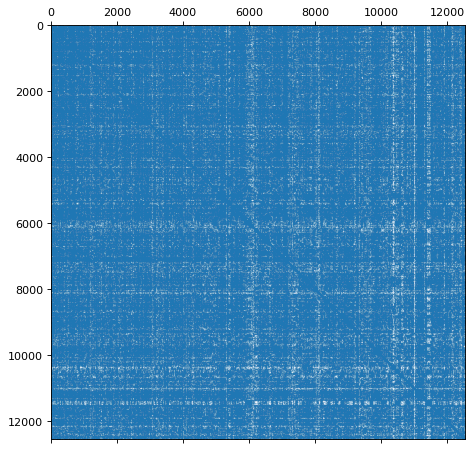

In [25]:
# Vidualize similarity between books
plt.figure(figsize=(6, 6), dpi=80)
plt.spy(cosine_sim, precision = 0.1, markersize = 0.04)
plt.tight_layout()
plt.show()

## Recommendation function

In [88]:
books = pd.Series(model_data['book_title'])
books.head()

0                                  classical mythology
1                                         clara callan
2                                    decision normandy
3    flu story great influenza pandemic 1918 search...
4                                        mummy urumchi
Name: book_title, dtype: object

In [104]:
def recommend_books(book_name, n=10, cosine_sim=cosine_sim):
    # Normalize the input title
    book_name = book_name.lower().strip()

    # Check if the title exists in the dataset
    if book_name not in books.values:
        raise ValueError(f"Title '{book_name}' not found in the dataset.")
    
    # Get the index of the book that matches the title
    idx = books[books == book_name].index[0]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar books
    sim_scores = sim_scores[1:n+1]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top n most similar books
    return books.iloc[book_indices].apply(lambda x: x.title())

In [101]:
display(recommend_books("Clara Callan", n=5))

2255                                      Crooked
515                                Winter Wedding
12013    Catching Heaven Ballantine Reader Circle
11716                           River Cross Heart
3556                            Tirra Lirra River
Name: book_title, dtype: object

In [102]:
display(recommend_books("Clara Callan", n=10))

2255                                      Crooked
515                                Winter Wedding
12013    Catching Heaven Ballantine Reader Circle
11716                           River Cross Heart
3556                            Tirra Lirra River
1864                                Maestro Novel
5497                      Finding Forrester Novel
7667                                 Little Magic
5802                                   Cameo Lake
880                                   Montana Sky
Name: book_title, dtype: object

In [123]:
display(recommend_books("Sherlock Holmes"))

ValueError: Title 'sherlock holmes' not found in the dataset.

In [139]:
from fuzzywuzzy import process

def recommend_books2(title, cosine_sim=cosine_sim, threshold=70):
    # Normalize the input title
    title = title.lower().strip()

    # Check if the title exists in the dataset
    if title not in books.values:
        # Use fuzzy string matching to find similar titles
        match = process.extractOne(title, books.values)
        if match[1] >= threshold:
            title = match[0]
        else:
            raise ValueError(f"No similar title found for '{title}' in the dataset.")

    # Get the index of the book that matches the title
    idx = books[books == title].index[0]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar books
    sim_scores = sim_scores[1:6]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar books
    return books.iloc[book_indices].apply(lambda x: x.title())

In [140]:
display(recommend_books2("Sherlock Holmes"))

6248                         El Sabueso De Los Baskerville
10515                                      Railroad Arthur
4642          Adventure Sherlock Holmes World Best Reading
4104                             Adventure Sherlock Holmes
7040     Embassy Row Mycroft Holmes Novel Mycroft Holme...
Name: book_title, dtype: object

In [141]:
display(recommend_books2("Harry Potter"))

1608             Harry Potter Chamber Secret Book 2
8085    Harry Potter Sorcerer Stone Book 1 Audio Cd
1632              Harry Potter Order Phoenix Book 5
9206           Harry Potter E La Camera Dei Segreti
8079       Harry Potter Goblet Fire Book 4 Audio Cd
Name: book_title, dtype: object

In [111]:
df = model_data[['book_title', 'book_author']].apply(lambda x: x.str.strip().str.replace('_', ' '))
df.head()

,book_title,book_author
0,classical mythology,mark p morford
1,clara callan,richard bruce wright
2,decision normandy,carlo deste
3,flu story great influenza pandemic 1918 search...,gina bari kolata
4,mummy urumchi,e j w barber


In [133]:
def get_recommendations(title, n=5, cosine_sim=cosine_sim, threshold=70):
    # Normalize the input title
    title = title.lower().strip()

    # Check if the title exists in the dataset
    if title not in df['book_title'].values:
        raise ValueError(f"Title '{title}' not found in the dataset.")

    # Get the index of the book that matches the title
    idx = df[df == title].index[0]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top n most similar books
    sim_scores = sim_scores[1:n+1]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top n most similar books
    recommended_books = df.iloc[book_indices]

    # Get the author of the input book
    author = recommended_books.iloc[0]['book_author']
    
    # Filter books by the same author
    same_author_books = df[df['book_author'] == author]

    # Exclude the input book from the list of recommended books
    same_author_books = same_author_books[same_author_books['book_title'] != title]

    # If there are enough books by the same author, return them
    if len(same_author_books) >= n:
        author_recommendations = same_author_books['book_title'].iloc[:n].apply(lambda x: x.title())
    else:
        additional_books_needed = n - len(same_author_books)
        additional_author_books = recommended_books['book_title'].iloc[:additional_books_needed].apply(lambda x: x.title())
        author_recommendations = pd.concat([same_author_books['book_title'].apply(lambda x: x.title()), additional_author_books])

    # Return the recommendations
    return {
        "Similar Books": recommended_books['book_title'].apply(lambda x: x.title()).tolist(),
        "Other Books from the same Author": author_recommendations.tolist()
    }

In [134]:
display(get_recommendations("Clara Callan", n=5))

{'Similar Books': ['Oliver Twist World Classic',
  'Eyeliner God',
  'Written Bone Human Remains Unlock Secret Dead',
  'Vampire',
  'Unicorn'],
 'Other Books from the same Author': ['Great Expectation Wordsworth Classic',
  'Great Expectation',
  'Hard Time Penguin Popular Classic',
  'Tale Two City Penguin English Library',
  'Great Expectation Puffin Classic']}

In [135]:
display(get_recommendations("Montana Sky", n=5))

{'Similar Books': ['Oliver Twist World Classic',
  'Eyeliner God',
  'Written Bone Human Remains Unlock Secret Dead',
  'Vampire',
  'Unicorn'],
 'Other Books from the same Author': ['Great Expectation Wordsworth Classic',
  'Great Expectation',
  'Hard Time Penguin Popular Classic',
  'Tale Two City Penguin English Library',
  'Great Expectation Puffin Classic']}